In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Despite being a gold member...
1,Not Verified | Regarding the aircraft and seat...
2,Not Verified | I travelled with British Airway...
3,Not Verified | Food was lousy. Who ever is pl...
4,✅ Trip Verified | Had the worst experience. Th...


In [ ]:
df

,reviews
0,✅ Trip Verified | Despite being a gold member...
1,Not Verified | Regarding the aircraft and seat...
2,Not Verified | I travelled with British Airway...
3,Not Verified | Food was lousy. Who ever is pl...
4,✅ Trip Verified | Had the worst experience. Th...
...,...
995,✅ Trip Verified | British Airways changed pla...
996,✅ Trip Verified | Mumbai to Edinburgh via Lon...
997,✅ Trip Verified | Mumbai to London Heathrow. ...
998,✅ Trip Verified | Delhi to London. Having rea...


In [ ]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [ ]:
df

,reviews
0,"Despite being a gold member, the British Air..."
1,Regarding the aircraft and seat: The business...
2,I travelled with British Airways from Sweden ...
3,Food was lousy. Who ever is planning the Asi...
4,Had the worst experience. The flight from Lon...
...,...
995,British Airways changed plane and consequent...
996,Mumbai to Edinburgh via London. I'm quite su...
997,Mumbai to London Heathrow. Disappointing exp...
998,Delhi to London. Having read many negative r...


In [ ]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,"Despite being a gold member, the British Air...",Despite being a gold member the British Airwa...
1,Regarding the aircraft and seat: The business...,Regarding the aircraft and seat The business ...
2,I travelled with British Airways from Sweden ...,I travelled with British Airways from Sweden ...
3,Food was lousy. Who ever is planning the Asi...,Food was lousy Who ever is planning the Asian...
4,Had the worst experience. The flight from Lon...,Had the worst experience The flight from Lond...


In [ ]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,reviews,Cleaned Reviews,POS tagged
0,"Despite being a gold member, the British Air...",Despite being a gold member the British Airwa...,"[(Despite, None), (gold, n), (member, n), (Bri..."
1,Regarding the aircraft and seat: The business...,Regarding the aircraft and seat The business ...,"[(Regarding, v), (aircraft, n), (seat, v), (bu..."
2,I travelled with British Airways from Sweden ...,I travelled with British Airways from Sweden ...,"[(travelled, v), (British, a), (Airways, n), (..."
3,Food was lousy. Who ever is planning the Asi...,Food was lousy Who ever is planning the Asian...,"[(Food, n), (lousy, n), (ever, r), (planning, ..."
4,Had the worst experience. The flight from Lon...,Had the worst experience The flight from Lond...,"[(worst, a), (experience, n), (flight, n), (Lo..."


In [ ]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,"Despite being a gold member, the British Air...",Despite being a gold member the British Airwa...,"[(Despite, None), (gold, n), (member, n), (Bri...",Despite gold member British Airways staff He...
1,Regarding the aircraft and seat: The business...,Regarding the aircraft and seat The business ...,"[(Regarding, v), (aircraft, n), (seat, v), (bu...",Regarding aircraft seat business class seat ...
2,I travelled with British Airways from Sweden ...,I travelled with British Airways from Sweden ...,"[(travelled, v), (British, a), (Airways, n), (...",travel British Airways Sweden Los Angeles vi...
3,Food was lousy. Who ever is planning the Asi...,Food was lousy Who ever is planning the Asian...,"[(Food, n), (lousy, n), (ever, r), (planning, ...",Food lousy ever plan Asian Hindu Vegetarian ...
4,Had the worst experience. The flight from Lon...,Had the worst experience The flight from Lond...,"[(worst, a), (experience, n), (flight, n), (Lo...",bad experience flight London Toronto get del...


In [ ]:
df[['POS tagged','Lemma']]

,POS tagged,Lemma
0,"[(Despite, None), (gold, n), (member, n), (Bri...",Despite gold member British Airways staff He...
1,"[(Regarding, v), (aircraft, n), (seat, v), (bu...",Regarding aircraft seat business class seat ...
2,"[(travelled, v), (British, a), (Airways, n), (...",travel British Airways Sweden Los Angeles vi...
3,"[(Food, n), (lousy, n), (ever, r), (planning, ...",Food lousy ever plan Asian Hindu Vegetarian ...
4,"[(worst, a), (experience, n), (flight, n), (Lo...",bad experience flight London Toronto get del...
...,...,...
995,"[(British, a), (Airways, n), (changed, v), (pl...",British Airways change plane consequently se...
996,"[(Mumbai, n), (Edinburgh, n), (via, None), (Lo...",Mumbai Edinburgh via London quite surprised ...
997,"[(Mumbai, n), (London, n), (Heathrow, n), (Dis...",Mumbai London Heathrow Disappointing experie...
998,"[(Delhi, n), (London, n), (read, v), (many, a)...",Delhi London read many negative review Briti...


In [ ]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.4 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,"Despite being a gold member, the British Air...",Despite being a gold member the British Airwa...,"[(Despite, None), (gold, n), (member, n), (Bri...",Despite gold member British Airways staff He...,0.7951,Positive
1,Regarding the aircraft and seat: The business...,Regarding the aircraft and seat The business ...,"[(Regarding, v), (aircraft, n), (seat, v), (bu...",Regarding aircraft seat business class seat ...,0.8676,Positive
2,I travelled with British Airways from Sweden ...,I travelled with British Airways from Sweden ...,"[(travelled, v), (British, a), (Airways, n), (...",travel British Airways Sweden Los Angeles vi...,-0.7902,Negative
3,Food was lousy. Who ever is planning the Asi...,Food was lousy Who ever is planning the Asian...,"[(Food, n), (lousy, n), (ever, r), (planning, ...",Food lousy ever plan Asian Hindu Vegetarian ...,-0.5574,Negative
4,Had the worst experience. The flight from Lon...,Had the worst experience The flight from Lond...,"[(worst, a), (experience, n), (flight, n), (Lo...",bad experience flight London Toronto get del...,0.1546,Neutral


In [ ]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    524
Negative    370
Neutral     106
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7face5cc8370>,
 [Text(-0.08285944828829273, 1.096874793141569, 'Positive'),
  Text(-0.2802478556160989, -1.0637016214251902, 'Negative'),
  Text(1.2758351325693755, -0.44129889474332934, 'Neutral')],
 [Text(-0.04519606270270512, 0.598295341713583, '52.4%'),
  Text(-0.15286246669969028, -0.58020088441374, '37.0%'),
  Text(0.8033036019881252, -0.2778548596532074, '10.6%')])

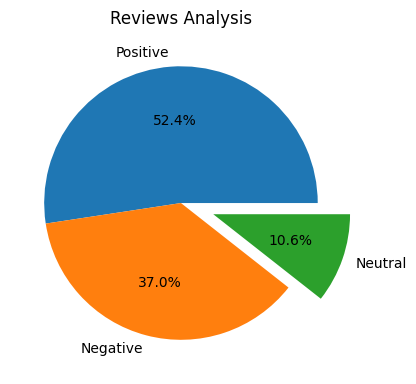

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)


In [ ]:
df.to_csv("BA_reviews.csv")


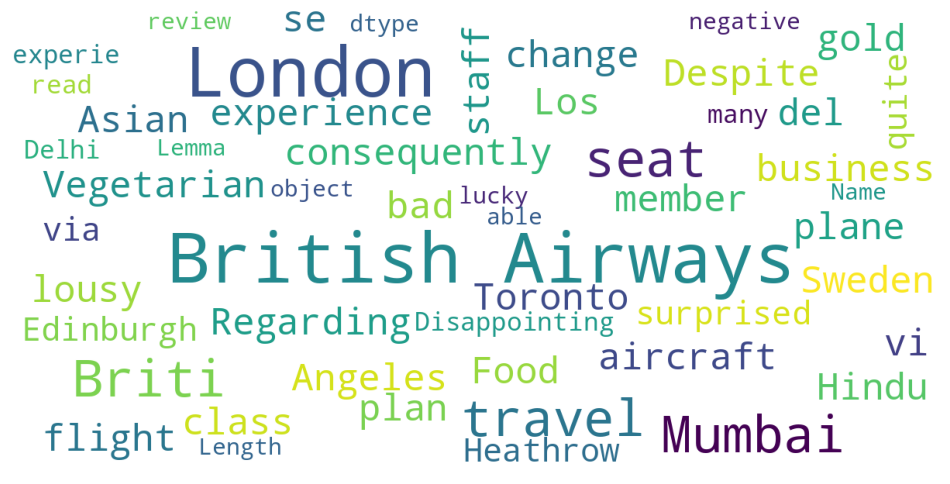

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)